# Learning Gadfly by Reproducing Seaborn plots

In [1]:
# load packages
using DataFrames
using CSV
using StatsBase
using Gadfly
using Compose
using ColorSchemes

In [2]:
# make directory if not exists
if !isdir("data")
    mkdir("data")
end

## 1. Grouped boxplot
https://seaborn.pydata.org/examples/grouped_boxplot.html

![](https://seaborn.pydata.org/_images/grouped_boxplot.png)

In [3]:
# download and sample data
file_name = joinpath(pwd(), "data", "tips.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv", file_name)
end
tips = DataFrame(CSV.File(file_name))
tips[sample(1:nrow(tips), 7, replace = false), :]

7×7 DataFrame
 Row │ total_bill  tip      sex      smoker   day      time     size  
     │ Float64     Float64  String7  String3  String7  String7  Int64 
─────┼────────────────────────────────────────────────────────────────
   1 │      13.0      2.0   Female   Yes      Thur     Lunch        2
   2 │      16.21     2.0   Female   No       Sun      Dinner       3
   3 │      18.69     2.31  Male     No       Sat      Dinner       3
   4 │      16.4      2.5   Female   Yes      Thur     Lunch        2
   5 │      20.53     4.0   Male     Yes      Thur     Lunch        4
   6 │      48.17     5.0   Male     No       Sun      Dinner       6
   7 │      24.27     2.03  Male     Yes      Sat      Dinner       2

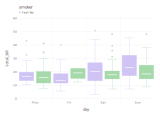

In [4]:
# visualize data
set_default_plot_size(16cm, 12cm)
plot(
    tips, 
    x = :day, 
    y = :total_bill, 
    color = :smoker, 
    Geom.boxplot, 
    Scale.x_discrete(levels = ["Thur", "Fri", "Sat", "Sun"]), 
    Scale.color_discrete_manual("#D0C4F4", "#A6D9AA", order = [2, 1]), 
    Theme(
        key_position = :top, 
        boxplot_spacing = 10px, 
        background_color = "white",
    ), 
)

## 2. Scatterplot with varying point sizes and hues
https://seaborn.pydata.org/examples/scatter_bubbles.html

![](https://seaborn.pydata.org/_images/scatter_bubbles.png)

In [5]:
# download and sample data
file_name = joinpath(pwd(), "data", "mpg.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv", file_name)
end
mpg = DataFrame(CSV.File(file_name))
mpg[sample(1:nrow(mpg), 7, replace = false), :]

7×9 DataFrame
 Row │ mpg      cylinders  displacement  horsepower  weight  acceleration  mod ⋯
     │ Float64  Int64      Float64       Float64?    Int64   Float64       Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    19.1          6         225.0        90.0    3381          18.7      ⋯
   2 │    17.0          8         260.0       110.0    4060          19.0
   3 │    33.0          4         105.0        74.0    2190          14.2
   4 │    25.4          6         168.0       116.0    2900          12.6
   5 │    28.0          4         140.0        90.0    2264          15.5      ⋯
   6 │    24.5          4         151.0        88.0    2740          16.0
   7 │    13.0          8         360.0       170.0    4654          13.0
                                                               3 columns omitted

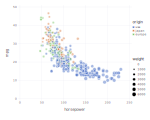

In [6]:
# visualize data
set_default_plot_size(15cm, 12cm)
plot(
    mpg,
    x = :horsepower,
    y = :mpg,
    color = :origin, 
    # shape = :origin, 
    size = :weight,
    alpha = [0.5],
    Geom.point, 
    Scale.color_discrete_manual("#5377C9", "#DF8A56", "#82CA70"), 
    Scale.size_area(
        minvalue = minimum(mpg.weight), 
        maxvalue = maximum(mpg.weight)
    ),
    Theme(
        background_color = "white", 
        default_color = "black", 
    ),
)

## 3. Annotated heatmaps
https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

![](https://seaborn.pydata.org/_images/spreadsheet_heatmap.png)

In [7]:
# download and sample data
file_name = joinpath(pwd(), "data", "flights.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv", file_name)
end
flights = DataFrame(CSV.File(file_name))
flights[sample(1:nrow(flights), 7, replace = false), :]

7×3 DataFrame
 Row │ year   month      passengers 
     │ Int64  String15   Int64      
─────┼──────────────────────────────
   1 │  1950  January           115
   2 │  1951  December          166
   3 │  1957  September         404
   4 │  1956  September         355
   5 │  1952  June              218
   6 │  1950  February          126
   7 │  1957  July              465

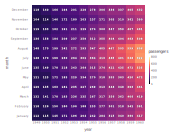

In [8]:
# visualize data
set_default_plot_size(17cm, 14cm)
plot(
    flights,
    x = :year,
    y = :month,
    color = :passengers,
    Geom.rectbin,
    Scale.ContinuousColorScale(
        palette -> get(ColorSchemes.magma, palette)
    ),
    Guide.xticks(
        ticks=[minimum(flights.year):maximum(flights.year);]
    ),
    Theme(background_color = "white"),
    Guide.annotation(
        compose(
            context(),
            text(
                flights.year,
                1:length(unique(flights.month)),
                string.(flights.passengers),
                repeat([hcenter], nrow(flights)),
                repeat([vcenter], nrow(flights)),
            ),
            fontsize(7pt),
            stroke("white"),
        ),
    )
)

## 4. Multiple linear regression
https://seaborn.pydata.org/examples/multiple_regression.html

![](https://seaborn.pydata.org/_images/multiple_regression.png)

In [9]:
# download and sample data
file_name = joinpath(pwd(), "data", "penguins.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv", file_name)
end
penguins = DataFrame(CSV.File(file_name))
penguins[sample(1:nrow(penguins), 7, replace = false), :]

7×7 DataFrame
 Row │ species   island     bill_length_mm  bill_depth_mm  flipper_length_mm   ⋯
     │ String15  String15   Float64?        Float64?       Int64?              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Adelie    Dream                34.0           17.1                185   ⋯
   2 │ Adelie    Dream                38.8           20.0                190
   3 │ Adelie    Biscoe               37.6           17.0                185
   4 │ Adelie    Torgersen            34.6           21.1                198
   5 │ Gentoo    Biscoe               49.3           15.7                217   ⋯
   6 │ Gentoo    Biscoe               46.5           13.5                210
   7 │ Adelie    Biscoe               43.2           19.0                197
                                                               2 columns omitted

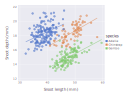

In [10]:
# visualize data
set_default_plot_size(12.5cm, 10cm)
plot(
    dropmissing(penguins, [:bill_length_mm, :bill_depth_mm]), 
    x=:bill_length_mm, 
    y=:bill_depth_mm, 
    color=:species,
    Geom.smooth(method=:lm), Geom.point, alpha=[0.6],
    Guide.xlabel("Snoot length (mm)"), 
    Guide.ylabel("Snoot  depth (mm)"), 
    Scale.color_discrete_manual("#5377C9", "#DF8A56", "#82CA70"), 
    Theme(
        background_color = "white", 
        panel_fill = "#EAEAF1", 
        grid_color = "white", 
        grid_line_width = 1.5px, 
        discrete_highlight_color = identity, 
        line_width = 2.5px, # 1mm
     ), 
)

## 5. Multiple bivariate KDE plots¶
https://seaborn.pydata.org/examples/multiple_bivariate_kde.html

![](https://seaborn.pydata.org/_images/multiple_bivariate_kde.png)

In [11]:
# download and sample data
file_name = joinpath(pwd(), "data", "iris.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv", file_name)
end
iris = DataFrame(CSV.File(file_name))
iris[sample(1:nrow(iris), 7, replace = false), :]

7×5 DataFrame
 Row │ sepal_length  sepal_width  petal_length  petal_width  species    
     │ Float64       Float64      Float64       Float64      String15   
─────┼──────────────────────────────────────────────────────────────────
   1 │          6.5          2.8           4.6          1.5  versicolor
   2 │          5.0          3.2           1.2          0.2  setosa
   3 │          4.9          3.1           1.5          0.2  setosa
   4 │          6.4          3.2           4.5          1.5  versicolor
   5 │          5.6          3.0           4.1          1.3  versicolor
   6 │          6.0          3.4           4.5          1.6  versicolor
   7 │          4.8          3.4           1.9          0.2  setosa

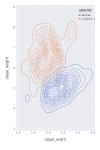

In [12]:
# visualize data
set_default_plot_size(10cm, 15cm)
plot(
    subset(iris, :species => ByRow(!=("versicolor"))), 
    x=:sepal_width, 
    y=:sepal_length, 
    color=:species, 
    Scale.color_discrete_manual("#5377C9", "#DF8A56", "#82CA70"), 
    Geom.density2d, 
    Theme(
        background_color = "white", 
        panel_fill = "#EAEAF1", 
        grid_color = "white", 
        grid_line_width = 1.5px, 
    ), 
    Guide.colorkey(pos=[0.78w,-0.42h]), 
)

## 6. Horizontal bar plots¶
https://seaborn.pydata.org/examples/part_whole_bars.html

![](https://seaborn.pydata.org/_images/part_whole_bars.png)

In [13]:
# download and sample data
file_name = joinpath(pwd(), "data", "car_crashes.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/car_crashes.csv", file_name)
end
car_crashes = DataFrame(CSV.File(file_name))
car_crashes[sample(1:nrow(car_crashes), 7, replace = false), :]

7×8 DataFrame
 Row │ total    speeding  alcohol  not_distracted  no_previous  ins_premium  i ⋯
     │ Float64  Float64   Float64  Float64         Float64      Float64      F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    15.1     5.738    4.53           13.137       12.684       661.88    ⋯
   2 │    21.4     4.066    4.922          16.692       16.264       872.51
   3 │    18.4     3.496    4.968          12.328       18.032       869.85
   4 │    18.8     7.332    5.64           18.048       15.04        784.55
   5 │    17.4     7.308    5.568          14.094       15.66        791.14    ⋯
   6 │    11.3     4.859    1.808           9.944       10.848       809.38
   7 │     9.6     2.208    2.784           8.448        8.448       777.18
                                                               2 columns omitted

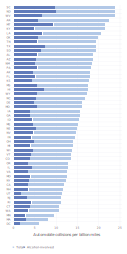

In [14]:
# visualize data
set_default_plot_size(5inch, 10inch)
p = plot(
    sort(car_crashes, :total, rev = false), 
    layer(
        x = :alcohol, 
        y = :abbrev, 
        Geom.bar(orientation = :horizontal), 
        Theme(
            default_color = color("#617BBA"), 
            bar_spacing = 3px, 
            bar_highlight = color("white")
        ), 
    ),
    layer(
        x = :total, 
        y = :abbrev, 
        Geom.bar(orientation = :horizontal), 
        Theme(
            default_color = color("#B2C8E7"), 
            bar_spacing = 3px, 
            bar_highlight = color("white"), 
        ), 
    ), 
    Guide.xlabel("Automobile collisions per billion miles"), 
    Guide.ylabel(""), 
    Guide.manual_color_key("", ["Total", "Alcohol-involved"], ["#B2C8E7", "#617BBA"]), 
    Theme(
        background_color = "white",
        key_position = :bottom, 
    ),
)

## 7. Scatterplot with categorical variables
https://seaborn.pydata.org/examples/scatterplot_categorical.html

![](https://seaborn.pydata.org/_images/scatterplot_categorical.png)

In [15]:
# download and sample data
file_name = joinpath(pwd(), "data", "penguins.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv", file_name)
end
penguins = DataFrame(CSV.File(file_name))
penguins[sample(1:nrow(penguins), 7, replace = false), :]

7×7 DataFrame
 Row │ species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  ⋯
     │ String15   String15   Float64?        Float64?       Int64?             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Adelie     Biscoe               39.6           20.7                191  ⋯
   2 │ Chinstrap  Dream                47.5           16.8                199
   3 │ Gentoo     Biscoe               50.5           15.9                222
   4 │ Adelie     Torgersen            39.3           20.6                190
   5 │ Adelie     Biscoe               35.5           16.2                195  ⋯
   6 │ Chinstrap  Dream                48.1           16.4                199
   7 │ Adelie     Dream                36.0           17.9                190
                                                               2 columns omitted

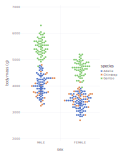

In [16]:
# visualize data
set_default_plot_size(12cm, 16cm)
plot(
    dropmissing(penguins, [:body_mass_g, :sex, :species]), 
    x = :sex, 
    y = :body_mass_g, 
    color = :species, 
    Geom.beeswarm, 
    Scale.color_discrete_manual("#5377C9", "#DF8A56", "#82CA70"), 
    Guide.yticks(ticks = 2000:1000:7000), 
    Guide.ylabel("body mass (g)"), 
    Theme(
        background_color = "white",
        # key_position = :inside, 
    ), 
)

## 8. Scatterplot with continuous hues and sizes¶
https://seaborn.pydata.org/examples/scatterplot_sizes.html

![](https://seaborn.pydata.org/_images/scatterplot_sizes.png)

In [17]:
# download and sample data
file_name = joinpath(pwd(), "data", "planets.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv", file_name)
end
planets = DataFrame(CSV.File(file_name))
planets[sample(1:nrow(planets), 7, replace = false), :]

7×6 DataFrame
 Row │ method           number  orbital_period  mass          distance  year  
     │ String31         Int64   Float64?        Float64?      Float64?  Int64 
─────┼────────────────────────────────────────────────────────────────────────
   1 │ Radial Velocity       2       191.99           0.101      38.64   2011
   2 │ Radial Velocity       1       277.02           1.7        80.64   2013
   3 │ Transit               2        42.6318   missing        2100.0    2011
   4 │ Radial Velocity       1        14.275          0.0316     17.72   2011
   5 │ Transit               1         3.7681   missing         920.0    2011
   6 │ Radial Velocity       1         2.24572        0.45       52.72   2005
   7 │ Radial Velocity       1      3827.0            0.48       20.48   2014

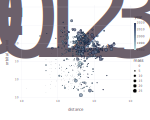

In [18]:
# visualize data
set_default_plot_size(15cm, 12cm)
plot(
    dropmissing(planets, [:distance, :orbital_period, :year, :mass]),
    x = :distance,
    y = :orbital_period,
    color = :year, 
    size = :mass,
    alpha = [0.7],
    Geom.point, 
    Scale.color_continuous(colormap=Scale.lab_gradient("#BADCE0", "#354267")),
    Scale.size_area(
        minvalue = minimum(dropmissing(planets, :mass).mass), 
        maxvalue = maximum(dropmissing(planets, :mass).mass)
    ),
    Scale.x_log10(), 
    Scale.y_log10(), 
    Theme(
        background_color = "white", 
        default_color = "black", 
    ),
)

## 9. Facetting histograms by subsets of data
https://seaborn.pydata.org/examples/faceted_histogram.html

![](https://seaborn.pydata.org/_images/faceted_histogram.png)

In [19]:
# download and sample data
file_name = joinpath(pwd(), "data", "penguins.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv", file_name)
end
penguins = DataFrame(CSV.File(file_name))
penguins[sample(1:nrow(penguins), 7, replace = false), :]

7×7 DataFrame
 Row │ species   island     bill_length_mm  bill_depth_mm  flipper_length_mm   ⋯
     │ String15  String15   Float64?        Float64?       Int64?              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Adelie    Dream                40.8           18.9                208   ⋯
   2 │ Adelie    Dream                38.8           20.0                190
   3 │ Adelie    Dream                39.8           19.1                184
   4 │ Adelie    Torgersen            35.1           19.4                193
   5 │ Adelie    Torgersen            35.5           17.5                190   ⋯
   6 │ Gentoo    Biscoe          missing        missing              missing  
   7 │ Gentoo    Biscoe               54.3           15.7                231
                                                               2 columns omitted

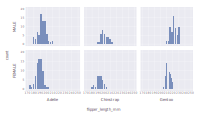

In [20]:
# visualize data
set_default_plot_size(20cm, 12cm)
plot(
     dropmissing(penguins, [:species, :sex, :flipper_length_mm]), 
     xgroup = "species", 
     ygroup = "sex", 
     x = "flipper_length_mm", 
     Geom.subplot_grid(
          Geom.histogram(minbincount = 7, maxbincount = 11)
     ), 
     Guide.xlabel("flipper_length_mm"), 
     Guide.ylabel("count"), 
     Theme(
          default_color = "#7A8FBC", 
          bar_spacing = 1.5px, 
          background_color = "white", 
          panel_fill = "#EAEAF1", 
          grid_color = "white", 
          grid_line_width = 1.5px, 
    ), 
)

## 10. Grouped barplot
https://seaborn.pydata.org/examples/grouped_barplot.html

![](https://seaborn.pydata.org/_images/grouped_barplot.png)

In [21]:
# download and sample data
file_name = joinpath(pwd(), "data", "penguins.csv")
if !isfile(file_name)
    download("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv", file_name)
end
penguins = DataFrame(CSV.File(file_name))
penguins[sample(1:nrow(penguins), 7, replace = false), :]

7×7 DataFrame
 Row │ species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  ⋯
     │ String15   String15   Float64?        Float64?       Int64?             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Gentoo     Biscoe               45.7           13.9                214  ⋯
   2 │ Adelie     Dream                43.2           18.5                192
   3 │ Adelie     Biscoe               42.2           19.5                197
   4 │ Adelie     Torgersen            42.9           17.6                196
   5 │ Chinstrap  Dream                46.1           18.2                178  ⋯
   6 │ Gentoo     Biscoe               46.2           14.1                217
   7 │ Chinstrap  Dream                43.2           16.6                187
                                                               2 columns omitted

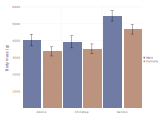

In [22]:
# visualize data
set_default_plot_size(16cm, 12cm)

fun(x, μ = mean(x), σ = std(x)) = (body_mass_g = μ, ymin = μ - σ, ymax = μ + σ)
palette = ["#717CA4", "#BB937F"]

plot(
    combine(groupby(dropmissing(penguins), [:species, :sex]), :body_mass_g => fun => AsTable), 
    x = :species, 
    y = :body_mass_g, 
    color = :sex, 
    ymin = :ymin, ymax = :ymax, Geom.errorbar, Stat.dodge, 
    Geom.bar(position = :dodge), 
    Scale.x_discrete(levels = ["Adelie", "Chinstrap", "Gentoo"]), 
    Scale.color_discrete_manual(
        palette..., 
        levels = ["MALE", "FEMALE"], 
        order = [1, 2], 
    ), 
    Guide.colorkey(
        title = "", 
        labels = ["Male", "Female"], 
    ), 
    Guide.xlabel(""), 
    Guide.ylabel("Body mass (g)"), 
    Guide.yticks(ticks = 1000:1000:6000), 
    Theme(
        background_color = "white", 
        bar_spacing = 3mm, 
        stroke_color = c -> "black", 
    ), 
)